In [1]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부 : target 값이 됨.
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
- home.dest : 고향/목적지

In [6]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head(2)
df_test = pd.read_csv('titanic_test.csv')
df_test.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"


name,cabin의 데이터를 추가

In [7]:
# 데이터 중에 ticket,body,home.dest 를 제거
df_train = df_train.drop(['ticket','body','home.dest'],axis=1)
df_train
df_test = df_test.drop(['ticket','body','home.dest'],axis=1)

In [8]:
df_test.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,7.8958,NaN,S
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,21.0000,NaN,S


In [9]:
# 데이터 전처리 - 결측치 
# age 데이터의 평균값으로 nan 데이터를 처리

# 결측치에 넣을 평균값 - train,test세트 모두 적용
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark : 결측값 - 데이터 2개
# 데이터중 가장 많이 나온 결과의 값을 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [10]:
# train,test세트 합치기
whole_df = pd.concat([df_train,df_test])

In [11]:
train_idx_num = len(df_train)

In [12]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [14]:
# cabin 데이터 처리
# cabin : 선실 이름
whole_df['cabin'].value_counts().head()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
Name: count, dtype: int64

In [15]:
# 결측치 데이터를 X 로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

In [18]:
# cabin의 데이터 앞 첫글자를 저장
whole_df['cabin'] = whole_df['cabin'].str[0]

In [20]:
whole_df['cabin'].value_counts()

cabin
X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [21]:
# 항목중 데이터가 적은 수는 X로 대체
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X','T':'X'})

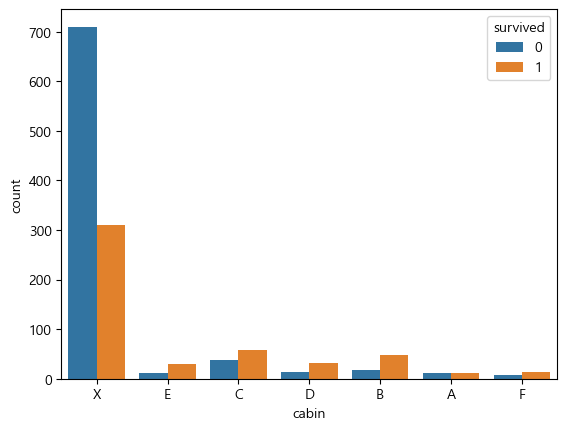

In [22]:
ax = sns.countplot(x='cabin',hue='survived',data=whole_df)